In [1]:
import pandas as pd
df = pd.read_csv('id_rnd_compare1.csv',sep = ';')

In [2]:
df['id_rnd_similarity'].value_counts()

False    35639
True       516
Name: id_rnd_similarity, dtype: int64

<AxesSubplot:>

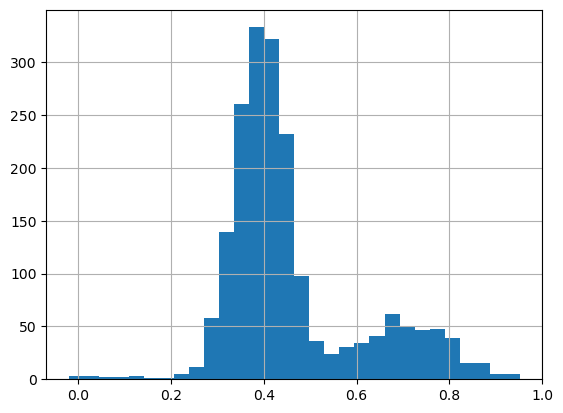

In [3]:
df['id_rnd_similarity_score'][:2000].hist(bins = 30)

In [4]:
df.index < 3000

array([ True,  True,  True, ..., False, False, False])

In [5]:
df3 = df[(df['id_rnd_similarity_score'] > 0.45) | (df.index < 3000)]
df3

,name_pair_1,name_pair_2,id_rnd_similarity,id_rnd_similarity_score
0,0001e96803--6229f737a9ea9b57ccd29104.jpg,0001e96803--6229f93cc72a824e5bbd6311.jpg,True,0.939298
1,0001e96803--62209c15326f565941d98028.jpg,0001e96803--62209cb307d635144a51e9fb.jpg,True,0.951985
2,0001e96803--6229f737a9ea9b57ccd29104.jpg,0001e96803--622a094a9503bf6b99093359.jpg,True,0.907294
3,0001e96803--63499a3888d4494ceaf08f42.jpg,0001e96803--63456e3ddd61db125822e059.jpg,True,0.935114
4,0001e96803--634768f46004ae67601eea2b.jpg,0001e96803--634687c2c9f9ee0f1910f2f2.jpg,True,0.932251
...,...,...,...,...
36561,0001e96803--6281ee1c0a339251c27c5d77.jpg,0001e96803--622b2672839fdc6ec44cce14.jpg,True,0.503721
36728,0001e96803--6241bce38f1f2072bb943e24.jpg,0001e96803--62fe2b6732fe117801056c88.jpg,False,0.463280
36945,0001e96803--63037767d04c025ae9e47444.jpg,0001e96803--62753a7aa371142effe1ecdd.jpg,False,0.476999
37036,0001e96803--6363067461871a0232dbb4e1.jpg,0001e96803--62da8510c73c7c0d30a9ff4e.jpg,False,0.460305


In [6]:
# от сюда нужно выкинуть пары, которые уже были проверены в первой иттерации

In [7]:
df2 = pd.read_csv('pairs.csv',sep = ';')
set_df2 = list(df2['name_pair_1'] + '_' + df2['name_pair_2'])

In [8]:
#эти 2709 пар нужно разметить в 3-й иттерации
df4 = df3[~(df3['name_pair_1'] + '_' + df3['name_pair_2']).isin(set_df2)]
df4

,name_pair_1,name_pair_2,id_rnd_similarity,id_rnd_similarity_score
974,0001e96803--63b58a5f6be44128abed3bd9.jpg,0001e96803--62c5717faefc110042a7555b.jpg,False,-0.012783
975,0001e96803--62e3a86fa385947eb993c4de.jpg,0001e96803--6249ba8eae75ac2e1083f693.jpg,False,0.413697
976,0001e96803--622464b37d71593ef0ab87ff.jpg,0001e96803--62d65fd979008a4d229f365b.jpg,False,0.435246
977,0001e96803--624d59ec02ca553118f93a98.jpg,0001e96803--628a17dc8ecec626c1ce95ed.jpg,False,0.341697
978,0001e96803--62decde562d3c5376b7fde3b.jpg,0001e96803--63062d7e0b55c35e8c676def.jpg,False,0.377260
...,...,...,...,...
36561,0001e96803--6281ee1c0a339251c27c5d77.jpg,0001e96803--622b2672839fdc6ec44cce14.jpg,True,0.503721
36728,0001e96803--6241bce38f1f2072bb943e24.jpg,0001e96803--62fe2b6732fe117801056c88.jpg,False,0.463280
36945,0001e96803--63037767d04c025ae9e47444.jpg,0001e96803--62753a7aa371142effe1ecdd.jpg,False,0.476999
37036,0001e96803--6363067461871a0232dbb4e1.jpg,0001e96803--62da8510c73c7c0d30a9ff4e.jpg,False,0.460305


In [9]:
df4['name_pair_2'] = 'https://storage.yandexcloud.net/license-anti-spoofing/live_selfie/' + df['name_pair_2']

C:\Users\user\AppData\Local\Temp\ipykernel_9700\2919538991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['name_pair_2'] = 'https://storage.yandexcloud.net/license-anti-spoofing/live_selfie/' + df['name_pair_2']


In [10]:
df4['name_pair_1'] = 'https://storage.yandexcloud.net/license-anti-spoofing/live_selfie/' + df['name_pair_1']

C:\Users\user\AppData\Local\Temp\ipykernel_9700\356071134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['name_pair_1'] = 'https://storage.yandexcloud.net/license-anti-spoofing/live_selfie/' + df['name_pair_1']


In [11]:
df4.to_excel('./task_3.xlsx')